In [2]:
!pip install pandas

In [3]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [ ]:
!pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Training and Evaluating Drug Classification Model
In this part, we will experiment with creating Python code that processes data and trains a model using a scikit-learn pipeline. We will then evaluate it and save the results and model.

## Loading the Dataset
We will use pandas to load our CSV file, shuffle it using the sample function, and display the top three rows.



In [5]:
import pandas as pd

drug_df = pd.read_csv("Data/drug.csv")
drug_df = drug_df.sample(frac=1)
drug_df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/drug.csv'

## Train Test Split
Create a dependent variable and an independent variable. Then split them into training and testing sets. This will help you to evaluate the performance of your model.

In [ ]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

## Machine Learning Pipelines
We will build a processing pipeline using ColumnTransformer, which will convert categorical values into numbers, fill in missing values, and scale the numerical columns.

After that, we'll create a training pipeline that will take the transformed data and train a random forest classifier.

Finally, we'll train the model.

By using pipelines, we can ensure reproducibility, modularity, and clarity in our code.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

# Model Evaluation
Evaluate the performance of the model by calculating both the accuracy and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 93.0% F1: 0.91


Our model has performed exceptionally well.

Accuracy: 93.0% F1: 0.91
Create the metrics file and save it in the Results folder.

In [ ]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}.")

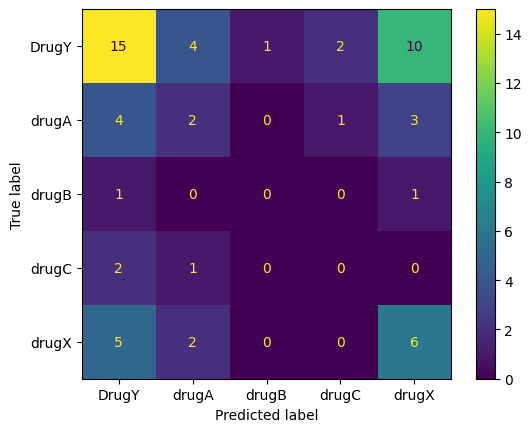

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

In [ ]:
!pip install skops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 3.2 MB/s eta 0:00:00


## Saving the Model
We will now save our model using the skops Python package. This will help us save both the scikit-learn pipeline and model.

In [ ]:
import skops.io as sio

sio.dump(pipe, "Model/drug_pipeline.skops")

ModuleNotFoundError: No module named 'skops'

In [ ]:
sio.load("Model/drug_pipeline.skops", trusted=True)

NameError: name 'sio' is not defined